IMPORTING THE DEPENDENCIES

In [1]:
import os  # for accessing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image #PIL -> pillow libary used for image processing libraries
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 #extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/drive/MyDrive/dep/FaceMask (1).zip'

with ZipFile(dataset,'r') as zip:  # r for reading the file
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [4]:
with_mask_files=os.listdir('/content/data/with_mask') # create list contain files with mask
print(with_mask_files[:5])  # print the first five elements
print(with_mask_files[-5:]) # print the last five elements of the list

['with_mask_3389.jpg', 'with_mask_1865.jpg', 'with_mask_1457.jpg', 'with_mask_993.jpg', 'with_mask_1620.jpg']
['with_mask_2966.jpg', 'with_mask_2663.jpg', 'with_mask_2944.jpg', 'with_mask_2327.jpg', 'with_mask_418.jpg']


In [5]:
without_mask_files=os.listdir('/content/data/without_mask') # create list contain files without mask
print(without_mask_files[:5])  # print the first five elements
print(without_mask_files[-5:])  # print the last five elements of the list

['without_mask_3509.jpg', 'without_mask_1042.jpg', 'without_mask_178.jpg', 'without_mask_1165.jpg', 'without_mask_88.jpg']
['without_mask_907.jpg', 'without_mask_1968.jpg', 'without_mask_2769.jpg', 'without_mask_2288.jpg', 'without_mask_1331.jpg']


In [6]:
print('Number of mask images:',len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

Number of mask images: 3725
number of without mask images: 3828


Creating lables for the two class of images

with masks-> 0


withoutmask -> 1


In [7]:
#creating the labels
with_mask_labels = [0]*3725
without_mask_labels = [1]*3828

In [8]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels # adding the to list

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


Displaying the images


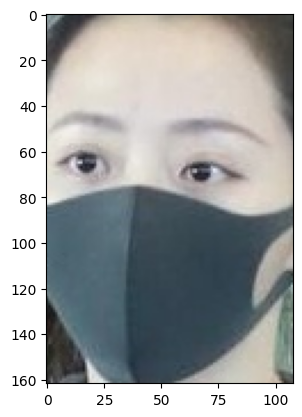

In [11]:
# dispolaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_1349.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

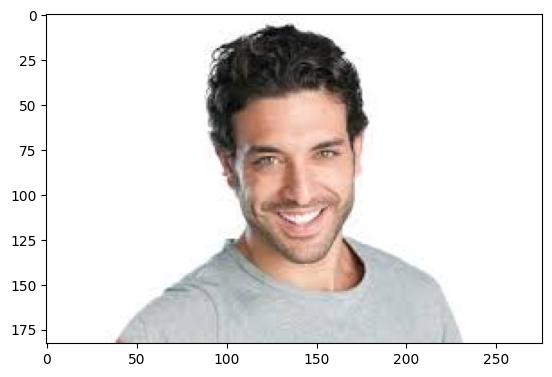

In [12]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the images

image processing

1.Resize the images


2.Convert the images to numpy arrays

In [13]:
#convert images to numpy arrays
with_mask_path = '/content/data/with_mask/' # don't forgot to add /
data = [] # create a empty list


for img_file in os.listdir(with_mask_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(with_mask_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(with_mask_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
without_mask_path = '/content/data/without_mask/'
for img_file in os.listdir(without_mask_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(without_mask_path ,img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(without_mask_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


array([[[203, 194,  67],
        [203, 194,  71],
        [204, 193,  76],
        ...,
        [218, 218,  87],
        [212, 212,  88],
        [139, 139, 120]],

       [[203, 196,  65],
        [203, 195,  68],
        [202, 194,  70],
        ...,
        [219, 220,  91],
        [212, 213,  94],
        [139, 139, 122]],

       [[202, 198,  68],
        [201, 198,  69],
        [200, 197,  65],
        ...,
        [220, 221,  95],
        [212, 213, 101],
        [139, 139, 123]],

       ...,

       [[ 81,  80,  13],
        [ 83,  84,  28],
        [ 80,  78,  24],
        ...,
        [ 86,  78,  10],
        [ 88,  83,  18],
        [123, 123, 110]],

       [[ 93,  90,  34],
        [129, 128, 103],
        [115, 115,  86],
        ...,
        [ 90,  77,  17],
        [ 86,  81,  16],
        [122, 123, 111]],

       [[ 76,  86,  12],
        [ 87,  93,  38],
        [ 94,  99,  50],
        ...,
        [ 85,  76,   6],
        [ 85,  81,   9],
        [123, 123, 110]]], dtype=uint8)
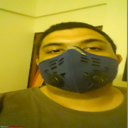

In [15]:
data[0]

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [19]:
type(X)

numpy.ndarray

In [20]:
type(Y)

numpy.ndarray

In [21]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Train test Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [23]:
print(X.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [24]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [25]:
x_train_scaled[0]

array([[[1.        , 0.99607843, 1.        ],
        [1.        , 1.        , 0.97647059],
        [1.        , 1.        , 0.96862745],
        ...,
        [0.99607843, 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[1.        , 0.99607843, 1.        ],
        [1.        , 1.        , 0.98039216],
        [1.        , 1.        , 0.97647059],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 0.99607843],
        [1.        , 1.        , 0.98431373],
        [1.        , 1.        , 0.98823529],
        ...,
        [0.52941176, 0.53333333, 0.53333333],
        [0.4745098 , 0.47843137, 0.48627451],
        [0.49411765, 0.50196078, 0.50980392]],

       ...,

       [[1.        , 1.        , 0.99215686],
        [1.        , 1.        , 1.        ],
        [1.        , 1

Building a convolutional Netural Networks (CNN)

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [29]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - acc: 0.7984 - loss: 0.4917 - val_acc: 0.8711 - val_loss: 0.2599
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9076 - loss: 0.2273 - val_acc: 0.9025 - val_loss: 0.2345
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9332 - loss: 0.1687 - val_acc: 0.9074 - val_loss: 0.2283
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9490 - loss: 0.1409 - val_acc: 0.9190 - val_loss: 0.2133
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9441 - loss: 0.1361 - val_acc: 0.9256 - val_loss: 0.2043


model evaluation

In [30]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9266 - loss: 0.1945
Test Accuracy=  0.9278623461723328


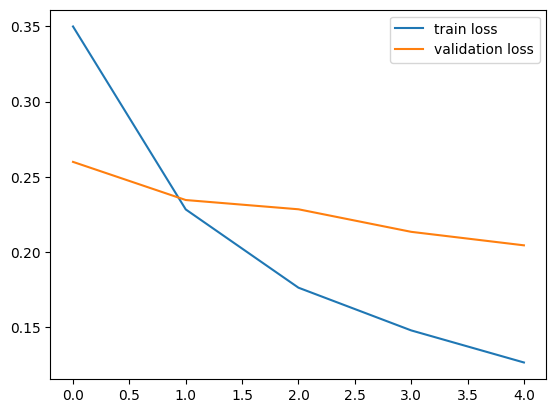

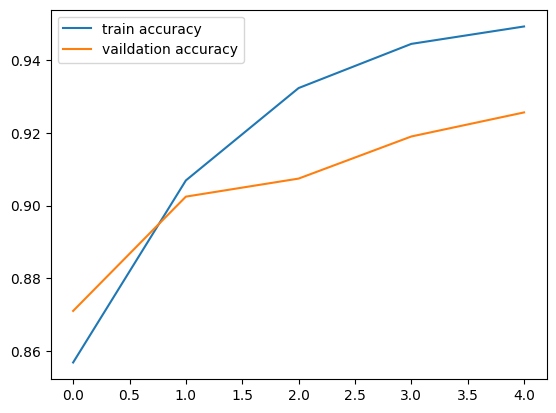

In [31]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive System

path of the image to be pedicted: /content/data/without_mask/without_mask_10.jpg


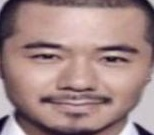

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
[[0.6478587  0.33186743]]
0
The person in the image is  wearing a mask


In [33]:
# @title Default title text
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is not wearing a mask')

else:
  print('The person in the image is  wearing a mask')